# 第6章
自然言語100本ノック　https://nlp100.github.io/ja/　\
解答解説　https://kakedashi-engineer.appspot.com/nlp100/

# **50. データの入手・整形**
News Aggregator Data Setをダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．

ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
抽出された事例をランダムに並び替える．
抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．
学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip NewsAggregatorDataset.zip

--2023-12-15 05:27:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘NewsAggregatorDataset.zip’

NewsAggregatorDatas     [     <=>            ]  27.87M  28.0MB/s    in 1.0s    

2023-12-15 05:27:10 (28.0 MB/s) - ‘NewsAggregatorDataset.zip’ saved [29224203]

Archive:  NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


In [2]:
# 行数の確認
!wc -l ./newsCorpora.csv

# 先頭10行の確認
!head -10 ./newsCorpora.csv

# 読込時のエラー回避のためダブルクォーテーションをシングルクォーテーションに置換
!sed -e 's/"/'\''/g'

422937 ./newsCorpora.csv
1	Fed official says weak data caused by weather, should not slow taper	http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss	Los Angeles Times	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.latimes.com	1394470370698
2	Fed's Charles Plosser sees high bar for change in pace of tapering	http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html	Livemint	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.livemint.com	1394470371207
3	US open: Stocks fall after Fed official hints at accelerated tapering	http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.ifamagazine.com	1394470371550
4	Fed risks falling 'behind the curve', Charles Plosser says	http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430	IFA Magazine	b	ddUyU0VZ

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# データの読込
df = pd.read_csv('./newsCorpora.csv', header=None, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

# データの抽出
df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']), ['TITLE', 'CATEGORY']]

# データの分割(学習(train)、検証(valid)、評価(test))
train, valid_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=123, stratify=df['CATEGORY'])
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=123, stratify=valid_test['CATEGORY'])

# データの保存
train.to_csv('./train.txt', sep='\t', index=False)
valid.to_csv('./valid.txt', sep='\t', index=False)
test.to_csv('./test.txt', sep='\t', index=False)

# 事例数の確認
print('【学習データ】')
print(train['CATEGORY'].value_counts())
print('【検証データ】')
print(valid['CATEGORY'].value_counts())
print('【評価データ】')
print(test['CATEGORY'].value_counts())

【学習データ】
b    4502
e    4223
t    1219
m     728
Name: CATEGORY, dtype: int64
【検証データ】
b    562
e    528
t    153
m     91
Name: CATEGORY, dtype: int64
【評価データ】
b    563
e    528
t    152
m     91
Name: CATEGORY, dtype: int64


# **51. 特徴量抽出**
学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

In [4]:
import numpy as np

In [5]:
train = np.array(train)
valid = np.array(valid)
test = np.array(test)
print(test)

[['Google set to open its first flagship store in Manhattan...around the corner from  ...'
  't']
 ["How fear can be 'programmed' into infants by the smell their parents give off  ..."
  'm']
 ['US STOCKS-S&P 500 on path to new closing high; homebuilders lead' 'b']
 ...
 ["These Are The Best Parts Of 'X-Men: Days of Future Past'" 'e']
 ["There's More To Newlywed Stacy Keibler Than Being George Clooney's Ex"
  'e']
 ['Scientists solve the mystery of the shipwreck found under the World Trade  ...'
  't']]


In [6]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocessing(data):
  x=[]
  y=[]
  label={"b":0, "e":1, "t":2, "m":3} #business, entertainment, technology, medical

  for title, category in data:
    title = re.sub("[0-9]+", "0", title)
    x.append(title.lower())
    y.append(label[category])

  return x,y

In [7]:
X_train, Y_train = preprocessing(train)
X_valid, Y_valid = preprocessing(valid)
X_test, Y_test = preprocessing(test)

In [8]:
tfidfvectorizer = TfidfVectorizer(min_df = 0.001)

X_train_TFIDF = tfidfvectorizer.fit_transform(X_train).toarray()
X_valid_TFIDF = tfidfvectorizer.transform(X_valid).toarray()
X_test_TFIDF = tfidfvectorizer.transform(X_test).toarray()

In [9]:
X_train_TFIDF[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [10]:
X_train_TFIDF_df = pd.DataFrame(X_train_TFIDF, columns = tfidfvectorizer.get_feature_names_out())
X_valid_TFIDF_df = pd.DataFrame(X_valid_TFIDF, columns = tfidfvectorizer.get_feature_names_out())
X_test_TFIDF_df = pd.DataFrame(X_test_TFIDF, columns = tfidfvectorizer.get_feature_names_out())

In [11]:
print(X_train_TFIDF_df)

        0m  0nd   0s  0st  0th  abbvie  abc  about  above  abramson  ...  \
0      0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0    0.0       0.0  ...   
1      0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0    0.0       0.0  ...   
2      0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0    0.0       0.0  ...   
3      0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0    0.0       0.0  ...   
4      0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0    0.0       0.0  ...   
...    ...  ...  ...  ...  ...     ...  ...    ...    ...       ...  ...   
10667  0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0    0.0       0.0  ...   
10668  0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0    0.0       0.0  ...   
10669  0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0    0.0       0.0  ...   
10670  0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0    0.0       0.0  ...   
10671  0.0  0.0  0.0  0.0  0.0     0.0  0.0    0.0    0.0       0.0  ...   

       yield  yields  york       you  young  your   yr  yuan  zac  zone  
0        0.0 

# **52. 学習**
51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ

In [12]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 200)
model.fit(X_train_TFIDF, Y_train)

LogisticRegression(max_iter=200)

# **53. 予測**
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

In [13]:
def score(model, X):
  pred = model.predict([X]) #Xから予測
  pred_proba = model.predict_proba([X])[[0], pred]
  return pred[0], pred_proba[0]


for i in range(20):
  print(score(model, X_test_TFIDF[i]))

(2, 0.8046850892623635)
(1, 0.46643475628934017)
(0, 0.8828866244340192)
(0, 0.902310562019011)
(1, 0.5724253001856757)
(0, 0.5124987499149724)
(0, 0.9623876391785844)
(0, 0.8024778543262677)
(1, 0.8706410974747331)
(0, 0.7851686895917813)
(1, 0.9868474778840833)
(1, 0.6173638597268721)
(1, 0.8822510426778533)
(1, 0.9694341595025888)
(0, 0.8291377363822986)
(1, 0.9512184291551065)
(3, 0.7750272285912314)
(0, 0.5109662579651497)
(1, 0.7067384204521964)
(0, 0.9948946733534627)


In [14]:
# for i in range(20):
#   print(X_test_TFIDF[i])
#   print([X_test_TFIDF[i]])
#   print("\n")

# **54. 正解率の計測**
52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ

In [15]:
from sklearn.metrics import accuracy_score

train_pred =[]
test_pred = []

for X in X_train_TFIDF:
  train_pred.append(score(model, X)[0])

for X in X_test_TFIDF:
  test_pred.append(score(model, X)[0])

train_acc = accuracy_score(Y_train, train_pred)
test_acc = accuracy_score(Y_test, test_pred)

print(train_acc)
print(test_acc)

0.9149175412293853
0.8823088455772113


# **55. 混同行列の作成**
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

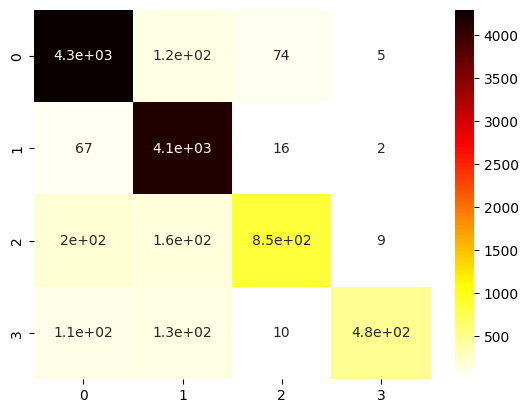

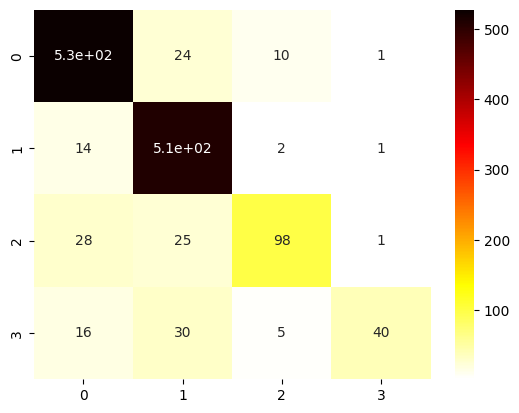

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_matrix = confusion_matrix(Y_train, train_pred)
sns.heatmap(train_matrix, annot = True, cmap = "hot_r")
plt.show()

test_matrix = confusion_matrix(Y_test, test_pred)
sns.heatmap(test_matrix, annot = True, cmap = "hot_r")
plt.show()

# **56. 適合率，再現率，F1スコアの計測**
52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calc(Y, pred):
  ppv = precision_score(Y, pred, average = None)
  ppv_micro = precision_score(Y, pred , average = "micro").reshape(1)
  ppv_macro = precision_score(Y, pred , average = "macro").reshape(1)
  ppv = np.concatenate([ppv, ppv_micro, ppv_macro])

  recall = recall_score(Y, pred, average = None)
  recall_micro = recall_score(Y, pred , average = "micro").reshape(1)
  recall_macro = recall_score(Y, pred , average = "macro").reshape(1)
  recall = np.concatenate([recall, recall_micro, recall_macro])

  f1 = f1_score(Y, pred, average = None)
  f1_micro = f1_score(Y, pred , average = "micro").reshape(1)
  f1_macro = f1_score(Y, pred , average = "macro").reshape(1)
  f1 = np.concatenate([f1, f1_micro, f1_macro])

  index = ["0", "1", "2", "3", "micro", "macro"]
  scores = pd.DataFrame({"ppv": ppv, "recall":recall, "f1":f1}, index =index)

  return(scores)


print(calc(Y_test, test_pred))

            ppv    recall        f1
0      0.901024  0.937833  0.919060
1      0.866102  0.967803  0.914132
2      0.852174  0.644737  0.734082
3      0.930233  0.439560  0.597015
micro  0.882309  0.882309  0.882309
macro  0.887383  0.747483  0.791072


# **57. 特徴量の重みの確認**
52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

In [18]:
features = X_train_TFIDF_df.columns.values

for i, coef in enumerate(model.coef_):
  top = features[np.argsort(-coef)[:10]]
  worst = features[np.argsort(coef)[:10]]

  categ = ["business", "entertainment", "technology", "medical"]
  print(categ[i])
  print("top\n",top)
  print("worst\n",worst)
  print("\n")

business
top
 ['bank' 'stocks' 'fed' 'ecb' 'china' 'ukraine' 'oil' 'obamacare' 'euro'
 'yellen']
worst
 ['ebola' 'her' 'video' 'she' 'aereo' 'the' 'microsoft' 'and' 'sony'
 'virus']


entertainment
top
 ['kardashian' 'chris' 'star' 'movie' 'she' 'miley' 'thrones' 'paul' 'he'
 'kim']
worst
 ['us' 'google' 'update' 'study' 'gm' 'china' 'facebook' 'billion' 'ceo'
 'risk']


technology
top
 ['google' 'facebook' 'apple' 'microsoft' 'climate' 'gm' 'tesla' 'nasa'
 'earth' 'comcast']
worst
 ['stocks' 'fed' 'her' 'percent' 'american' 'drug' 'cancer' 'shares'
 'ukraine' 'york']


medical
top
 ['ebola' 'study' 'mers' 'fda' 'cancer' 'drug' 'cases' 'cigarettes' 'could'
 'health']
worst
 ['facebook' 'gm' 'ceo' 'bank' 'apple' 'google' 'game' 'climate' 'twitter'
 'best']




# **58. 正則化パラメータの変更**
ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

In [19]:
result = []

for C in np.logspace(-5, 2, 10, base =np.e):

  model = LogisticRegression(C=C, max_iter = 250)
  model.fit(X_train_TFIDF, Y_train)
  train_pred1 = []
  valid_pred1 =[]
  test_pred1 =[]

  for X in X_train_TFIDF:
    train_pred1.append(score(model, X)[0])
  for X in X_valid_TFIDF:
    valid_pred1.append(score(model, X)[0])
  for X in X_test_TFIDF:
    test_pred1.append(score(model, X)[0])

  train_acc1 = accuracy_score(Y_train, train_pred1)
  valid_acc1 = accuracy_score(Y_valid, valid_pred1)
  test_acc1 = accuracy_score(Y_test, test_pred1)

  print("valid_acc", valid_acc1)

  result.append([C, train_acc1, valid_acc1, test_acc1])

result = np.array(result).T #転置

valid_acc 0.7443778110944528
valid_acc 0.7578710644677661
valid_acc 0.7631184407796102
valid_acc 0.7758620689655172
valid_acc 0.8110944527736131
valid_acc 0.848575712143928
valid_acc 0.8740629685157422
valid_acc 0.8778110944527736
valid_acc 0.881559220389805
valid_acc 0.876311844077961


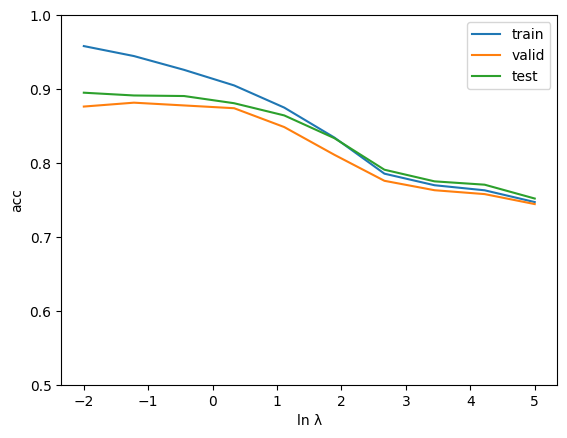

In [20]:
plt.plot(-np.log(result[0]), result[1], label = "train") #loge
plt.plot(-np.log(result[0]), result[2], label = "valid")
plt.plot(-np.log(result[0]), result[3], label = "test")
plt.ylim(0.5, 1.0)

plt.ylabel("acc")
plt.xlabel("ln λ")
plt.legend()
plt.show()

# **59. ハイパーパラメータの探索**
学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

In [21]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.1 MB/s eta 0:00:00


In [22]:
import optuna

def study_lr_param(trial):
  l1_ratio = trial.suggest_uniform("l1_ratio", 0, 1)
  C = trial.suggest_loguniform("C", 1e-4, 1e4)

  model = LogisticRegression(random_state = 123, max_iter = 200,
                             penalty = "elasticnet", solver ="saga",
                             l1_ratio = l1_ratio, C = C )

  model.fit(X_train_TFIDF, Y_train)

  pred = model.predict(X_valid_TFIDF)
  acc = accuracy_score(Y_valid, pred)

  return acc

In [23]:
study_lr = optuna.create_study(direction = "maximize")
study_lr.optimize(study_lr_param, n_trials =1)

[I 2023-12-15 05:47:45,987] A new study created in memory with name: no-name-f7317872-8098-4455-bad5-69afaf284cd9
<ipython-input-22-a16d62dd8995>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  l1_ratio = trial.suggest_uniform("l1_ratio", 0, 1)
<ipython-input-22-a16d62dd8995>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-4, 1e4)
[I 2023-12-15 05:48:28,057] Trial 0 finished with value: 0.7008995502248876 and parameters: {'l1_ratio': 0.6582574444751867, 'C': 0.06577739607139055}. Best is trial 0 with value: 0.7008995502248876.
<ipython-input-22-a16d62dd8995>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be remove

In [32]:
from sklearn.naive_bayes import GaussianNB

def study_nb_param(trial):
  var_smoothing = trial.suggest_loguniform("alpha", 1e-12, 1e-6)

  model = GaussianNB(var_smoothing = var_smoothing)

  model.fit(X_train_TFIDF, Y_train)

  pred = model.predict(X_valid_TFIDF)
  acc = accuracy_score(Y_valid, pred)

  return acc



study_nb = optuna.create_study(direction = "maximize")
study_nb.optimize(study_nb_param, n_trials =10)

[I 2023-12-15 06:27:16,007] A new study created in memory with name: no-name-05396f70-e6ae-4e6d-939f-19cc6fd9f3a4
<ipython-input-32-7083e800f2ec>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  var_smoothing = trial.suggest_loguniform("alpha", 1e-12, 1e-6)
[I 2023-12-15 06:27:16,439] Trial 0 finished with value: 0.7233883058470765 and parameters: {'alpha': 1.3162896761649787e-11}. Best is trial 0 with value: 0.7233883058470765.
<ipython-input-32-7083e800f2ec>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  var_smoothing = trial.suggest_loguniform("alpha", 1e-12, 1e-6)
[I 2023-12-15 06:27:16,876] Trial 1 finished with value: 0.7278860569715142 and parameters: {'alpha':

In [33]:
print("study_lr.best_value\n", study_lr.best_value)
print("study_nb.best_value\n", study_nb.best_value)
if study_lr.best_value > study_nb.best_value: #return値
  study = study_lr
  print("study_lr")

else:
  study = study_nb
  print("study_nb")

for k, v in study.best_params.items():
  print(k, v)
print("acc", study.best_value)

study_lr.best_value
 0.8403298350824587
study_nb.best_value
 0.7316341829085458
study_lr
l1_ratio 0.8234143034194599
C 6309.441399526096
acc 0.8403298350824587


In [34]:
model = LogisticRegression(random_state = 123, max_iter = 200,
                             penalty = "elasticnet", solver ="saga",
                             l1_ratio = 0.2337238436698712, C = 5.403211698511446)

model.fit(X_train_TFIDF, Y_train)

pred = model.predict(X_valid_TFIDF)
acc = accuracy_score(Y_valid, pred)

print(acc)

0.8785607196401799
